In [20]:
!pip install kaggle   #install kaggle 
import kaggle 

In [22]:
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv     #download data set using kaggle api

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0




  0%|          | 0.00/200k [00:00<?, ?B/s]
100%|##########| 200k/200k [00:00<00:00, 102MB/s]


In [25]:
import pandas as pd 

In [33]:
df=pd.read_csv('orders.csv')   

Understand data structure 

In [39]:
df.columns  

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

In [47]:
df.head(20)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [45]:
df.shape

(9994, 16)

In [51]:
df.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           1
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [57]:
df[df['Ship Mode'].isnull()]

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
118,119,2023-07-19,NaN,Corporate,United States,Bristol,Tennessee,37620,South,Office Supplies,Binders,OFF-BI-10003650,140,160,1,5


In [59]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

#Data Cleaning and transformation

In [61]:
df['Ship Mode']=df['Ship Mode'].replace('Not Available','unknown').fillna('unknown')

In [63]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'unknown', 'First Class',
       'Same Day'], dtype=object)

In [65]:
df.head(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,unknown,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,unknown,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [69]:
df.duplicated().sum()

0

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9994 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [86]:
#Convert Order Date to datetime  in order to allow date based operations, otherwise Date will be treated as plain text (string)
df['Order Date']=pd.to_datetime(df['Order Date'])

In [109]:
#Rename Columns for Code-Friendliness
df.columns=df.columns.str.lower().str.replace(' ', '_')

In [115]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent', 'year'],
      dtype='object')

In [119]:
#df['year']=df['order_date'].dt.year
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

In [121]:
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,year,month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,2023,3
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,2023,8
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,2023,1
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,2022,6
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,2022,7


In [123]:
#postal_code can be dropped , since we have city and state info separately  
df=df.drop(columns=['postal_code'])

In [125]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'region', 'category', 'sub_category', 'product_id',
       'cost_price', 'list_price', 'quantity', 'discount_percent', 'year',
       'month'],
      dtype='object')

In [127]:
#renaming list_price to sale_price for easy understanding 
df=df.rename(columns={'list_price':'sale_price'})
df.head(2)

,order_id,order_date,ship_mode,segment,country,city,state,region,category,sub_category,product_id,cost_price,sale_price,quantity,discount_percent,year,month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,2023,3
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,2023,8


In [129]:
#Calculate sales and profit as these are important for business insights
#cost=cost_price*quantity
#sales=sale_price*quantity*(1 − (discount_percent/100))
#profit = sales-cost

df['cost']=df['cost_price']*df['quantity']
df['sales']=df['sale_price']*df['quantity']*(1-(df['discount_percent']/100))
df['profit']=df['sales']-df['cost']

In [211]:
df.head(20)

,order_id,order_date,ship_mode,segment,country,city,state,region,category,sub_category,product_id,cost_price,sale_price,quantity,discount_percent,year,month,cost,sales,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,2023,3,480,509.6,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,2023,8,1800,2124.3,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,2023,1,20,19.0,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,2022,6,3900,4704.0,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,2022,7,40,38.0,-2.0
5,6,2022-03-13,unknown,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3,2022,3,350,339.5,-10.5
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3,2022,12,40,38.8,-1.2
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,TEC-PH-10002275,860,910,6,5,2022,1,5160,5187.0,27.0
8,9,2023-03-23,unknown,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2,2023,3,60,58.8,-1.2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3,2023,5,450,533.5,83.5


#Verify Data Quality After Cleaning & Transformation

In [135]:
df.dtypes

order_id                     int64
order_date          datetime64[ns]
ship_mode                   object
segment                     object
country                     object
city                        object
state                       object
region                      object
category                    object
sub_category                object
product_id                  object
cost_price                   int64
sale_price                   int64
quantity                     int64
discount_percent             int64
year                         int32
month                        int32
cost                         int64
sales                      float64
profit                     float64
dtype: object

In [139]:
df[['sales', 'profit']].describe()


,sales,profit
count,9994.000000,9994.000000
mean,1108.597979,104.055253
std,3753.505952,455.289186
min,0.000000,-40.000000
25%,48.500000,-1.200000
50%,175.500000,14.000000
75%,731.500000,64.500000
max,130406.400000,21746.400000


#Business Insights Using Aggregations.

In [201]:
 #Sales and Profit yearly trend 
yearly_trend = df.groupby('year')[['sales', 'profit']].sum()
yearly_trend

,sales,profit
year,,
2022,5475541.3,517071.3
2023,5603786.9,522856.9


In [ ]:
 #Sales and Profit monthly trend 

In [209]:
monthly_trend=df.groupby('month')[['sales', 'profit']].sum()
monthly_trend

,sales,profit
month,,
1,872196.8,86046.8
2,1175649.9,114579.9
3,787157.1,71407.1
4,1019632.4,92432.4
5,824333.4,76263.4
6,794239.3,71249.3
7,797812.1,71862.1
8,999572.7,106832.7
9,854507.5,76927.5


In [223]:
# Segment-wise & Category-wise Sales and Profit
    #df['segment'].unique()
    #df['category'].unique()
segment_trend=df.groupby('segment')[['sales', 'profit']].sum()   #tells us which customer group is most valuable 
segment_trend

,sales,profit
segment,,
Consumer,5607860.1,514980.1
Corporate,3394916.1,330596.1
Home Office,2076552.0,194352.0


In [225]:
category_trend = df.groupby('category')[['sales', 'profit']].sum()  #tells us which is our best performing product
category_trend

,sales,profit
category,,
Furniture,3720742.4,342782.4
Office Supplies,3423675.1,317425.1
Technology,3934910.7,379720.7


In [229]:
sub_category_trend=df.groupby('sub_category')[['sales', 'profit']].sum().sort_values(by='sales')
sub_category_trend

,sales,profit
sub_category,,
Fasteners,16728.6,458.6
Labels,68208.8,4188.8
Envelopes,71639.7,6109.7
Art,131702.2,10412.2
Supplies,194112.5,14402.5
Paper,375602.6,32362.6
Furnishings,437753.7,39083.7
Appliances,528152.6,54582.6
Bookcases,576400.8,51270.8


In [245]:
#df['country'].unique()  #checked if there are different countries
df['region'].unique()
#df['state'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [255]:
#Region-wise  Sales and Profit
region_trend=df.groupby('region')[['sales','profit']].sum()
region_trend

,sales,profit
region,,
Central,2387881.2,236121.2
East,3257983.8,295773.8
South,1966053.6,202743.6
West,3467409.6,305289.6


In [257]:
#State-wise Sales and Profit
state_wise_trend=df.groupby('state')[['sales','profit']].sum()
state_wise_trend

,sales,profit
state,,
Alabama,114395.4,12785.4
Arizona,163995.6,15865.6
Arkansas,48215.7,4715.7
California,2219519.1,197269.1
Colorado,140097.2,11657.2
Connecticut,56774.8,5104.8
Delaware,111712.3,10392.3
District of Columbia,15336.1,1496.1
Florida,453911.3,53071.3


In [259]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,region,category,sub_category,product_id,cost_price,sale_price,quantity,discount_percent,year,month,cost,sales,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,2023,3,480,509.6,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,2023,8,1800,2124.3,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,2023,1,20,19.0,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,2022,6,3900,4704.0,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,2022,7,40,38.0,-2.0


In [283]:
#Product Performance Analysis
    #Top 5 Products by Sales
top5_prod_by_sales=df.groupby('product_id')[['sales']].sum().sort_values(by='sales', ascending=False).head(5)
top5_prod_by_sales

,sales
product_id,
TEC-CO-10004722,245056.0
OFF-BI-10000545,163777.7
TEC-MA-10002412,130406.4
FUR-CH-10002024,120090.7
TEC-PH-10001459,113041.9


In [285]:
top5_prod_by_profit=df.groupby('product_id')[['profit']].sum().sort_values(by='profit', ascending=False).head(5)
top5_prod_by_profit

,profit
product_id,
TEC-CO-10004722,24816.0
TEC-MA-10002412,21746.4
OFF-BI-10000545,17867.7
TEC-CO-10001449,15948.0
FUR-CH-10002024,13930.7


In [287]:
#bottom 5 products by profit
bottom5_prod_by_profit = df.groupby('product_id')[['profit']].sum().sort_values(by='profit', ascending=True).head(5)
bottom5_prod_by_profit

,profit
product_id,
OFF-FA-10002280,-48.2
OFF-BI-10002799,-44.5
OFF-PA-10000143,-39.5
OFF-AR-10003631,-37.0
OFF-BI-10003712,-35.7


In [297]:
import matplotlib.pyplot as plt

In [ ]:
top5_prod_by_sales = top5_prod_by_sales.reset_index()

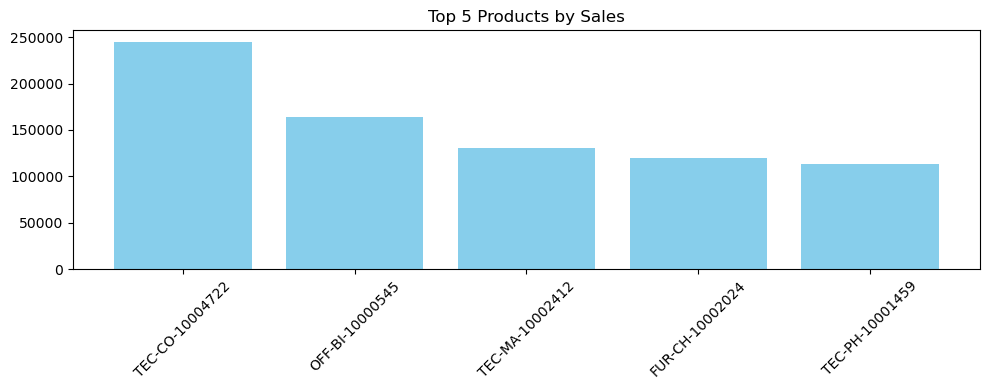

In [305]:
# Plot Top 5 by Sales
plt.figure(figsize=(10, 4))
plt.bar(top5_prod_by_sales['product_id'], top5_prod_by_sales['sales'], color='skyblue')
plt.title('Top 5 Products by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [309]:
top5_prod_by_profit = top5_prod_by_profit.reset_index()

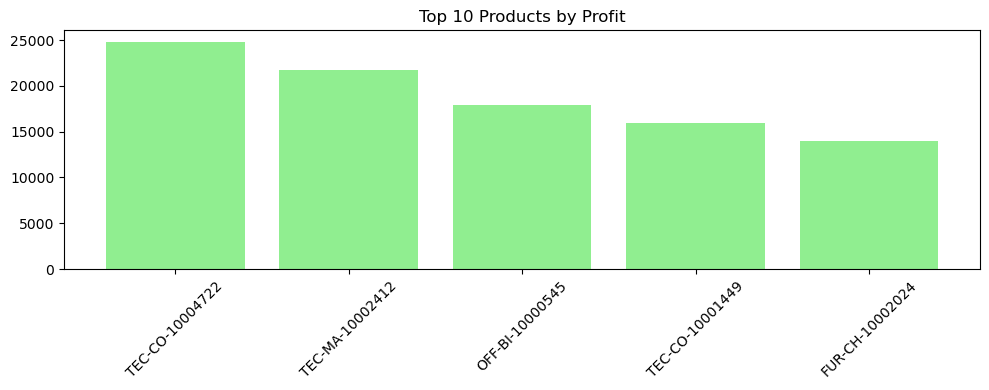

In [311]:
# Plot Top 10 by Profit
plt.figure(figsize=(10, 4))
plt.bar(top5_prod_by_profit['product_id'], top5_prod_by_profit['profit'], color='lightgreen')
plt.title('Top 10 Products by Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [323]:
#Customer Segment Analysis
#df['segment'].unique()
segment_analysis=df.groupby('segment')[['sales','profit']].sum()
segment_analysis

,sales,profit
segment,,
Consumer,5607860.1,514980.1
Corporate,3394916.1,330596.1
Home Office,2076552.0,194352.0


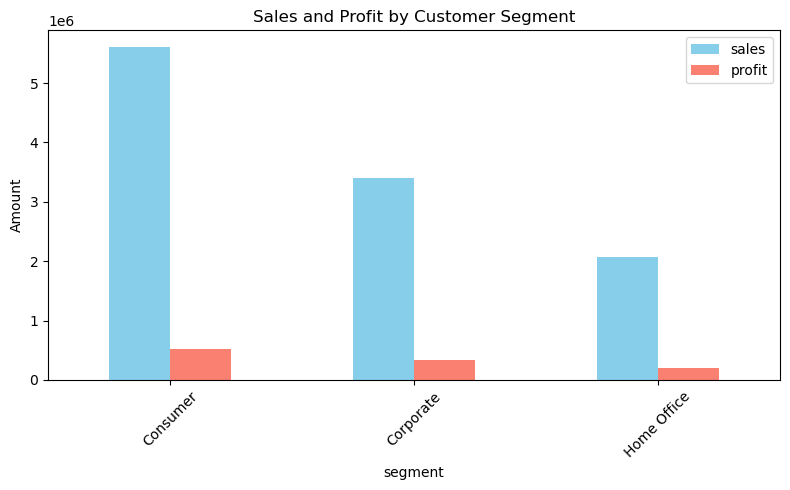

In [325]:
segment_analysis.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title('Sales and Profit by Customer Segment')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

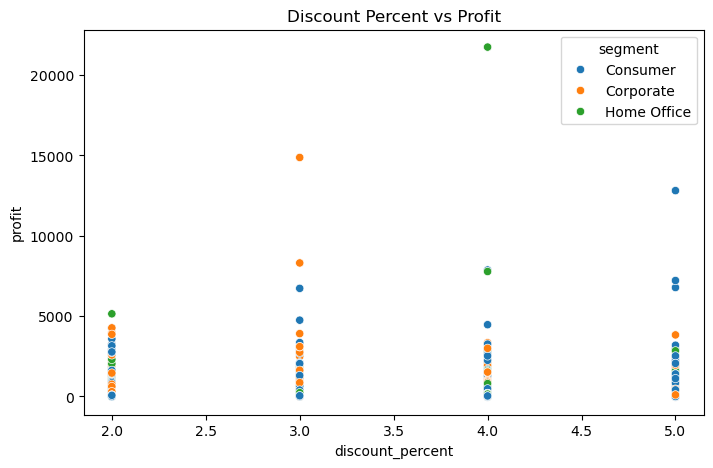

In [329]:
#Impact of Discounts on Profit
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='discount_percent', y='profit', hue='segment')
plt.title('Discount Percent vs Profit')
plt.show()


In [331]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,region,category,sub_category,product_id,cost_price,sale_price,quantity,discount_percent,year,month,cost,sales,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,2023,3,480,509.6,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,2023,8,1800,2124.3,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,2023,1,20,19.0,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,2022,6,3900,4704.0,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,2022,7,40,38.0,-2.0


In [339]:
#Shipping Mode Analysis  -- to assess logistics efficiency and customer preference.

ship_mode_analysis=df.groupby('ship_mode')[['sales','profit']].sum().sort_values(by='sales',ascending=False)
ship_mode_analysis

,sales,profit
ship_mode,,
Standard Class,6633953.8,628123.8
Second Class,2292257.2,216657.2
First Class,1567207.9,143217.9
Same Day,566567.4,49667.4
unknown,19341.9,2261.9


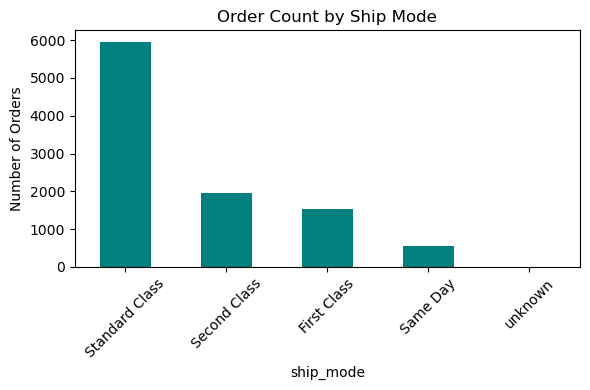

In [341]:
plt.figure(figsize=(6, 4))
df['ship_mode'].value_counts().plot(kind='bar', color='teal')
plt.title('Order Count by Ship Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [343]:
df.to_csv("retail_sales_cleaned.csv", index=False)